<a href="https://colab.research.google.com/github/happyrabbit/IntroDataScience/blob/master/Python/FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_width = X_train.shape[1]
img_height = X_train.shape[2]

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_train.shape[1]

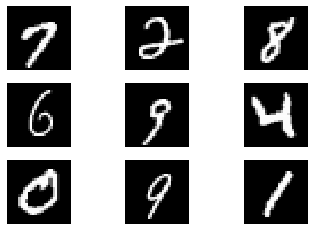

In [0]:
offset = 15
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i+offset], cmap='gray', interpolation='none')
    plt.axis('off')

## Without rescaling

In [0]:
# create model
model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height)))
model.add(Dense(num_classes, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 54us/sample - loss: 9.8117 - acc: 0.8390 - val_loss: 7.0638 - val_acc: 0.8690
Epoch 2/10
60000/60000 [==============================] - 3s 48us/sample - loss: 6.1600 - acc: 0.8786 - val_loss: 5.5009 - val_acc: 0.8951
Epoch 3/10
60000/60000 [==============================] - 3s 47us/sample - loss: 5.7405 - acc: 0.8830 - val_loss: 5.8994 - val_acc: 0.8864
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 5.5878 - acc: 0.8850 - val_loss: 5.6021 - val_acc: 0.8930
Epoch 5/10
60000/60000 [==============================] - 3s 45us/sample - loss: 5.4412 - acc: 0.8866 - val_loss: 5.8617 - val_acc: 0.8769
Epoch 6/10
60000/60000 [==============================] - 3s 47us/sample - loss: 5.4210 - acc: 0.8852 - val_loss: 6.5473 - val_acc: 0.8771
Epoch 7/10
60000/60000 [===========

## With rescaling

In [0]:
X_train = X_train / 255.
X_test = X_test / 255.

# create model
model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height)))
model.add(Dense(num_classes, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4673 - acc: 0.8776 - val_loss: 0.3090 - val_acc: 0.9137
Epoch 2/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3042 - acc: 0.9145 - val_loss: 0.2799 - val_acc: 0.9209
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2836 - acc: 0.9211 - val_loss: 0.2734 - val_acc: 0.9251
Epoch 4/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2728 - acc: 0.9241 - val_loss: 0.2711 - val_acc: 0.9249
Epoch 5/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2666 - acc: 0.9256 - val_loss: 0.2681 - val_acc: 0.9247
Epoch 6/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2621 - acc: 0.9273 - val_loss: 0.2677 - val_acc: 0.9248
Epoch 7/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2583 - acc: 0.9290 - val_loss: 0.

## Add more layers

In [0]:
# create model
model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height)))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.4073 - acc: 0.8783 - val_loss: 0.1446 - val_acc: 0.9575
Epoch 2/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.2066 - acc: 0.9431 - val_loss: 0.1091 - val_acc: 0.9698
Epoch 3/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.1658 - acc: 0.9542 - val_loss: 0.0934 - val_acc: 0.9731
Epoch 4/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.1464 - acc: 0.9589 - val_loss: 0.0819 - val_acc: 0.9747
Epoch 5/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.1267 - acc: 0.9635 - val_loss: 0.0778 - val_acc: 0.9777
Epoch 6/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.1207 - acc: 0.9657 - val_loss: 0.0763 - val_acc: 0.9773
Epoch 7/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.1077 - acc: 0.9693 - val